# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [871]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [872]:
# Выгрузка данных: 
telecom_data = pd.read_csv('telecom_users.csv', index_col=0)
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [873]:
# Проверим на пропуски: 
telecom_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [874]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Предобработка данных и feature-engineering: 

In [875]:
from pandas.api.types import CategoricalDtype


# Удалим столбец customerID за ненадобностью: 
telecom_data = telecom_data.drop(columns=['customerID'])

# Преобразование всех данных в категориальные: 
telecom_data.loc[:, 'gender'] = telecom_data.loc[:, 'gender'].astype(CategoricalDtype(categories=['Female', 'Male']))

for feature in telecom_data.columns:
    # Для всех столбцов только с ['Yes', 'No'] или ['Yes', 'No', 'No internet service']: 
    if set(telecom_data.loc[:, feature].unique()) in (set(['Yes', 'No']), set(['Yes', 'No', 'No internet service'])): 
        telecom_data.loc[:, feature] = telecom_data.loc[:, feature].astype(CategoricalDtype(categories=['Yes', 'No', 'No internet service']))

In [876]:
# Разделение tenure по 4 квантилям: 
telecom_data['tenure'] = pd.cut(x=telecom_data['tenure'], bins=4, labels=range(4))

In [877]:
telecom_data['MultipleLines'] = telecom_data['MultipleLines'].astype(CategoricalDtype(categories=['No phone service', 'Yes', 'No']))
telecom_data['InternetService'] = telecom_data['InternetService'].astype(CategoricalDtype(categories=['No', 'Fiber optic', 'DSL']))
telecom_data['Contract'] = telecom_data['Contract'].astype(CategoricalDtype(categories=['Month-to-month', 'One year', 'Two year']))
telecom_data['PaymentMethod'] = telecom_data['PaymentMethod'].astype(CategoricalDtype(
    categories=['Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check', 'Mailed check']
    ))

In [878]:
# Сегментация клиентов по ежемесячным оплатам + за все время: 
telecom_data['MonthlyCharges'] = pd.cut(x=telecom_data['MonthlyCharges'], bins=5, labels=range(5))
telecom_data = telecom_data.loc[telecom_data['TotalCharges'] != ' ']  # Пропуски в виде '' в  TotalCharges

tc_max, tc_min = telecom_data.TotalCharges.astype(float).max(), telecom_data.TotalCharges.astype(float).min()
delta = int((tc_max-tc_min) / 5)
telecom_data['TotalCharges'] = pd.cut(x=telecom_data['TotalCharges'].astype(float), bins=5, labels=range(5))

In [879]:
labels = [(int(num), int(num)+delta) for num in range(int(tc_min), int(tc_max), delta)][:-1]

In [880]:
telecom_data.TotalCharges

1869    0
4528    2
6344    1
6739    0
432     0
       ..
3772    0
5191    1
5226    0
5390    0
860     0
Name: TotalCharges, Length: 5976, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [881]:
telecom_data['SeniorCitizen'] = telecom_data['SeniorCitizen'].astype('category')

Все подключенные услуги можно использовать в новой фиче "Количество подключенных услуг" - ServicesNum. 

In [882]:
# Все возможные дополнительные сервисы и услуги для клиента: 
av_services = {
    num: column for num, column in enumerate(telecom_data.columns) 
    if column in ['InternetService', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    }

# Считаем, сколько на каждую строчку (клиента) приходится подключенных дополнительных услуг: 
NumOfConnnectedServices = telecom_data.apply(lambda x: len([1 for num, element in enumerate(x) if ((element=='Yes') & (num in av_services.keys()))]), axis=1)

# Заменяем текущие признаки итоговым NumOfConnnectedServices: 
telecom_data['ServicesNum'] = NumOfConnnectedServices.astype('category')

In [883]:
telecom_data.drop(columns=[
    'InternetService', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender'
    ], inplace=True)  

In [884]:
# Посмотрим на нынешнее состояние датасета: 
telecom_data.head(3)

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServicesNum
1869,0,Yes,Yes,3,Two year,No,Credit card (automatic),0,0,No,2
4528,0,No,No,2,Month-to-month,Yes,Credit card (automatic),3,2,No,4
6344,1,Yes,No,2,Month-to-month,Yes,Bank transfer (automatic),2,1,Yes,2


In [885]:
# Таблицы сопряженности целевого признака со всеми остальными: 
crosstabs = [
    pd.crosstab(index=telecom_data['Churn'], columns=telecom_data[column]) 
    for column in telecom_data.drop(columns=['Churn']).columns
    ]

In [886]:
# Кодирование данных: 
cat_columns = telecom_data.select_dtypes(['category']).columns
telecom_data[cat_columns] = telecom_data[cat_columns].apply(lambda x: x.cat.codes)

In [887]:
telecom_data.head()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServicesNum
1869,0,0,0,3,2,1,0,0,0,1,2
4528,0,1,1,2,0,0,0,3,2,1,4
6344,1,0,1,2,0,0,1,2,1,0,2
6739,0,1,1,0,0,0,2,1,0,1,2
432,0,1,1,0,0,1,2,1,0,1,3


In [888]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 1869 to 860
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SeniorCitizen     5976 non-null   int8 
 1   Partner           5976 non-null   int8 
 2   Dependents        5976 non-null   int8 
 3   tenure            5976 non-null   int8 
 4   Contract          5976 non-null   int8 
 5   PaperlessBilling  5976 non-null   int8 
 6   PaymentMethod     5976 non-null   int8 
 7   MonthlyCharges    5976 non-null   int8 
 8   TotalCharges      5976 non-null   int8 
 9   Churn             5976 non-null   int8 
 10  ServicesNum       5976 non-null   int8 
dtypes: int8(11)
memory usage: 110.9 KB


Рассмотрим базовые статистики по данным: 

In [889]:
round(telecom_data.describe(), 0)

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServicesNum
count,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0
mean,0.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,3.0
std,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50%,0.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,3.0
75%,0.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,5.0
max,1.0,1.0,1.0,3.0,2.0,1.0,3.0,4.0,4.0,1.0,8.0


# 2. Исследование зависимостей и формулирование гипотез

Исследуем зависимости между существующими категориальными признаками. Для категориальных переменных не подходит метод нахождения коэффициента корреляции, поэтому рассмотрим таблицы сопряженности целевого признака с остальными переменными.

In [944]:
crosstabs[8] # 0, 1, ..., 9

TotalCharges,0,1,2,3,4
Churn,,,,,
Yes,1091,246,128,91,31
No,2244,749,617,516,263


## Ключевые гипотезы

* Если клиент является пенсионером, отток может в схожей степени как произойти ($ P = \frac{402}{5976} = 7$%) так и не произойти ($ P = \frac{564}{5976} = 9$%). Это значит, что **переменная оттока не зависит от того, является ли клиент пенсионером**. 
* **Отток зависит от наличия у клиента партнера**.   
Так, если клиент состоит в браке, он с вероятностью 80% не откажется от услуг оператора, против 67%, если не состоит. 
* **Отток зависит от наличия у клиента иждивенцов**.  
Так, если они есть, отток не произойдет с вероятностью 84%, против 69%, если их нет. 
* **Отток зависит от срока `tenure`** пользования клиентом услугами оператора.  
Чем больше срок - тем менее вероятность оттока. 
* **Отток зависит от типа контракта клиента.**  
Например, из 1587 клиентов, которых потеряла компания, всего 3% имеют тип подключения на два года, и 10% - на год. 
* **Есть зависимость между переменной оттока и способом оплаты**.  
Из числа клиентов, отказавшихся от услуг компании, 56% используют систему электронного чека, это значение выделяется. 
* **Существует зависимость между оттоком и суммарными затратами на услуги оператора**.  
Чем большую сумму клиент готов потратить, тем меньше вероятность оттока. 

# 3. Построение моделей для прогнозирования оттока + 4. Сравнение качества моделей 

In [892]:
!pip install sklearn

In [893]:
# kNN хорошо отрабатывает для данных с небольш. кол-вом классов: 
from sklearn.neighbors import KNeighborsClassifier
# Деревья решений очень мощны и универсальны: 
from sklearn.tree import DecisionTreeClassifier
# BernoulliNB основан на подсчете вероятностей по схеме Бернулли, идеально подходит для бинарной классиф.:
from sklearn.naive_bayes import BernoulliNB
# Логиcтическая регрессия 
from sklearn.linear_model import LogisticRegression
# Для стэкинга не-деревьевых моделей и ансамбля деревьев: 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler

In [894]:
telecom_data.drop(columns=['SeniorCitizen'], inplace=True)

In [895]:
# Разделение данных на значения и признак:  
y, X = telecom_data['Churn'], telecom_data.drop(columns=['Churn'])

Выбор метрики качества: 

Text(0.5, 1.0, 'Количеств. соотношение оттока\n пользователей за текущий период')

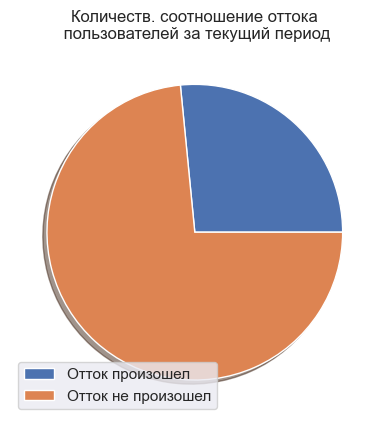

In [896]:
plt.set_cmap(cmap='Pastel1')
to_pie = {'Отток произошел': len(y[y==0]), 'Отток не произошел': len(y[y==1])}
plt.pie(to_pie.values(), shadow=True)
plt.legend(to_pie.keys())
plt.title('Количеств. соотношение оттока\n пользователей за текущий период')

Метрика accuracy неэффективна для данных, несбалансированных по классам. Поэтому берем precision, recall. 

In [897]:
from sklearn.metrics import precision_score, recall_score

In [898]:
# Разделение данных на тренировочную, тестовую выборки: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier() 
dtc = DecisionTreeClassifier(random_state=0) 
bnb = BernoulliNB() 
rfc = RandomForestClassifier(random_state=0)

estimators1 = [knn, dtc, bnb, rfc]
# Обучение основных алгоритмов: 
estimators_names = [
    'KNeighborsClassifier',
    'DecisionTreeClassifier', 
    'BernoulliNB', 
    'RandomForestClassifier' 
]

In [899]:
estimators1

[KNeighborsClassifier(),
 DecisionTreeClassifier(random_state=0),
 BernoulliNB(),
 RandomForestClassifier(random_state=0)]

In [900]:
def one_est(estimator, est_name, X_train=X_train, y_train=y_train): 
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    prc, rec = precision_score(y_pred=y_pred, y_true=y_test), recall_score(y_pred=y_pred, y_true=y_test)
    print('\n' + '='*30 + '\n' + est_name)
    print('Precision: {}\nRecall: {}'.format(prc, rec))    
    return prc, rec

In [901]:
from sklearn.preprocessing import StandardScaler

#### Логистическая регрессия: 

In [902]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state=0, n_jobs=-1, multi_class='ovr')

one_est(
    estimator=GridSearchCV(
        log_reg, 
        param_grid={'C': np.arange(0.1, 1.1, 0.1)}, 
        scoring='recall'
        ), 
    # estimator=LogisticRegression(random_state=0),
    est_name='LogisticRegression', 
    X_train=X_train, 
    y_train=y_train
)


LogisticRegression
Precision: 0.8341915550978373
Recall: 0.9070548712206047


(0.8341915550978373, 0.9070548712206047)

In [903]:
for num, estimator in enumerate(estimators1): 
    one_est(estimator=estimator, est_name=estimators_names[num], X_train=X_train, y_train=y_train)


KNeighborsClassifier
Precision: 0.8329809725158562
Recall: 0.8824188129899216

DecisionTreeClassifier
Precision: 0.8399044205495818
Recall: 0.7872340425531915

BernoulliNB
Precision: 0.8433598183881952
Recall: 0.832026875699888

RandomForestClassifier
Precision: 0.8317046688382194
Recall: 0.8577827547592385


In [904]:
# Стекинг моделей: 
stacked_model = StackingClassifier(
    estimators=(('dtc', knn), ('rfc', rfc)),
    final_estimator=log_reg
).fit(X_train, y_train)

In [905]:
y_pred_stacked = stacked_model.predict(X_test)
print('Precisionn value:', precision_score(y_true=y_test, y_pred=y_pred_stacked))
print('Recall value:', recall_score(y_true=y_test, y_pred=y_pred_stacked))

Precisionn value: 0.8081510934393639
Recall value: 0.910414333706607


## Общие выводы по работе: 
Стекинг использованных моделей обеспечил наивысшее качество по метрике recall. Используем данную вариацию. 

In [906]:
# from pickle import dump

# with open("models/model_v1.pkl", "wb") as f:
#     dump(stacked_model, f)